In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
sklearn.__version__

'1.2.2'

In [3]:
X_tra = np.load(r"C:\Users\cedcoss\Desktop\X_kannada_MNIST_train.npz")
X_tes = np.load(r"C:\Users\cedcoss\Desktop\X_kannada_MNIST_test.npz")
y_tra = np.load(r"C:\Users\cedcoss\Desktop\y_kannada_MNIST_train.npz")
y_tes = np.load(r"C:\Users\cedcoss\Desktop\y_kannada_MNIST_test.npz")

In [4]:
X_train_list = X_tra.files
X_test_list = X_tes.files
y_train_list = y_tra.files
y_test_list = y_tes.files

In [5]:
arrays ={}
for i in X_train_list:
    arrays[i]=X_tra[i]
data =arrays['arr_0']  
X_train = pd.DataFrame(data.reshape(data.shape[0], -1))
X_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
arrays ={}
for i in X_test_list:
    arrays[i]=X_tes[i]
data =arrays['arr_0']  
X_test = pd.DataFrame(data.reshape(data.shape[0], -1))
X_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
arrays ={}
for i in y_train_list:
    arrays[i]=y_tra[i]
data =arrays['arr_0']  
y_train = pd.DataFrame(data.reshape(data.shape[0], -1))
y_train

,0
0,0
1,1
2,2
3,3
4,4
...,...
59995,5
59996,6
59997,7
59998,8


In [8]:
arrays ={}
for i in y_test_list:
    arrays[i]=y_tes[i]
data =arrays['arr_0']  
y_test = pd.DataFrame(data.reshape(data.shape[0], -1))
y_test

,0
0,0
1,1
2,2
3,3
4,4
...,...
9995,5
9996,6
9997,7
9998,8


In [9]:
X_train.shape

(60000, 784)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
# Mean centric the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape

(60000, 15)

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

Accuracy:  0.8125
Precision : 0.8125
Recall : 0.8125
F1 Score : 0.8125
Confusion Matrix:
[[754 141   3  39   4   8   1   9  33   8]
 [ 71 848   3  30   4  15   0  10  12   7]
 [  5   5 972   3   0   8   3   2   1   1]
 [ 17  13   6 762  47  38  24  85   6   2]
 [  1   4   1  40 832  50  11   4  37  20]
 [  2   7   5  45 147 755   7   4  18  10]
 [  5   8   1  35  11   9 788 108  19  16]
 [ 14  20   2  70  25   8 134 694   8  25]
 [ 60  15   4  10  11  22   3   2 856  17]
 [ 11  24   0   4  25   5   4  11  52 864]]
ROC AUC Score: 0.8958333333333333


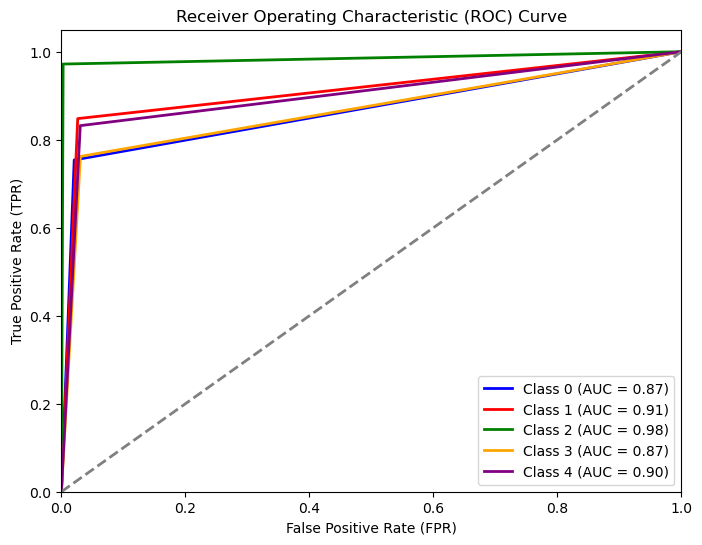

In [12]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve , auc

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Diagonal elements shows the correct predictions

# Calculate the ROC AUC score
y_pred_proba = clf.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
print("ROC AUC Score:", roc_auc)

# Calculate the FPR, TPR, and Thresholds for the ROC curve
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
n_classes = y_pred_proba.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Adjust the colors based on the number of classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Set plot properties
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
